# 🧩 Phase 0 — Project Bootstrapping & Environment Initialization

This phase sets up the **core analytics environment** for the fraud-detection pipeline.  
We ensure that all dependencies are loaded, directories are ready, and the runtime is validated.  
This step establishes a **solid foundation** for all subsequent phases.

---

## 🎯 Objectives

- **Activate core Python libraries:** `Pandas`, `NumPy`  
- **Enable ML toolkits:** `Isolation Forest`, `K-Means Clustering`  
- **Configure project folder structure** for organized workflows  
- **Validate the runtime environment** for consistency and reproducibility  

---

## ✅ Outcome

- Stable, ready-to-use environment  
- Ensures smooth execution of data cleaning, feature engineering, and modeling  
- Lays the foundation for a **professional, structured analytics workflow**


In [1]:
# ===================================================
# Phase 0 — Environment Setup & Initialization
# ===================================================

# -------------------------
# 1. Core Libraries
# -------------------------
import pandas as pd
import numpy as np

# -------------------------
# 2. Machine Learning & Feature Engineering Tools
# -------------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# -------------------------
# 3. File & Path Handling
# -------------------------
from pathlib import Path

# -------------------------
# 4. Runtime Confirmation
# -------------------------
print("Phase 0 complete — Environment initialized successfully. 🚀")


Phase 0 complete — Environment initialized successfully. 🚀


# 🧩 Phase 1 — Manual File Upload & Data Profiling

In this phase, we **manually upload the dataset** using Google Colab’s upload widget.  
The notebook automatically detects the file name, loads the dataset with a **robust multi-encoding strategy**, and performs a **structural audit**.

---

## 🎯 Key Steps

- **Load dataset** into a Pandas DataFrame  
- **Inspect schema** and column data types  
- **Detect missing values** across the dataset  
- **Count duplicate entries**  
- **Generate statistical summary** for all columns  

---

## ✅ Outcome

- Complete understanding of **data quality and structure**  
- Identifies potential issues like missing values, duplicates, or inconsistent formatting  
- Provides a solid foundation for **Phase 2 — Data Cleaning & Preprocessing**


In [2]:
# ===================================================
# Phase 1 — Manual File Upload & Data Profiling
# ===================================================

import pandas as pd
import numpy as np
from google.colab import files

# -------------------------
# 1. Manual File Upload
# -------------------------
print("📁 Please upload your dataset file (CSV)...")
uploaded = files.upload()   # User manually selects file

# Automatically detect uploaded filename
filename = list(uploaded.keys())[0]
print(f"\n📌 File uploaded: {filename}")

# -------------------------
# 2. Robust File Loading
# -------------------------
# Some CSVs may use different encodings, so we try multiple common ones
encodings = ["utf-8", "latin1", "ISO-8859-1", "cp1252"]

df = None
for enc in encodings:
    try:
        df = pd.read_csv(filename, encoding=enc)
        print(f"✔️ File successfully loaded using encoding: {enc}")
        break
    except Exception as e:
        print(f"❌ Failed with encoding {enc}: {e}")

# Validation: stop if loading failed
if df is None:
    raise ValueError("❌ Could not load file with any encoding. Please check the file.")

# -------------------------
# 3. Data Profiling
# -------------------------
# Dataset shape
print("\n📊 Dataset Shape:", df.shape)

# Preview first 5 rows
display(df.head())

# Column info & types
print("\n🔍 Data Info:")
display(df.info())

# Statistical summary for all columns
print("\n📈 Statistical Summary:")
display(df.describe(include='all'))

# -------------------------
# 4. Duplicate & Null Checks
# -------------------------
# Count duplicates
dup_count = df.duplicated().sum()
print(f"\n⚠️ Duplicate Rows Detected: {dup_count}")

# Check for missing values
print("\n🧯 Null Value Summary:")
display(df.isnull().sum())


📁 Please upload your dataset file (CSV)...


Saving Job_Frauds.csv to Job_Frauds.csv

📌 File uploaded: Job_Frauds.csv
❌ Failed with encoding utf-8: 'utf-8' codec can't decode byte 0xc2 in position 254: unexpected end of data
✔️ File successfully loaded using encoding: latin1

📊 Dataset Shape: (17880, 16)


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0



🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           17880 non-null  object
 1   Job Location        17534 non-null  object
 2   Department          6333 non-null   object
 3   Range_of_Salary     2868 non-null   object
 4   Profile             14572 non-null  object
 5   Job_Description     17879 non-null  object
 6   Requirements        15184 non-null  object
 7   Job_Benefits        10668 non-null  object
 8   Telecomunication    17880 non-null  int64 
 9   Comnpany_Logo       17880 non-null  int64 
 10  Type_of_Employment  14409 non-null  object
 11  Experience          10830 non-null  object
 12  Qualification       9775 non-null   object
 13  Type_of_Industry    12977 non-null  object
 14  Operations          11425 non-null  object
 15  Fraudulent          17880 non-null  int64 
dtypes: int64

None


📈 Statistical Summary:


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
count,17880,17534,6333,2868,14572,17879,15184,10668,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,11231,3105,1337,874,1709,14801,11963,6193,NaN,NaN,5,7,13,131,37,NaN
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,311,718,551,142,726,379,410,726,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,NaN,NaN,NaN,NaN,NaN,0.048434
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,NaN,NaN,NaN,NaN,NaN,0.214688
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000



⚠️ Duplicate Rows Detected: 288

🧯 Null Value Summary:


,0
Job Title,0
Job Location,346
Department,11547
Range_of_Salary,15012
Profile,3308
Job_Description,1
Requirements,2696
Job_Benefits,7212
Telecomunication,0
Comnpany_Logo,0


# 🧩 Phase 2 — Data Cleaning & Preprocessing

In this phase, we implement a **structured data-quality refinement process** to ensure the dataset is **reliable, consistent, and ML-ready**.  

The focus areas include:

---

## 🎯 Key Steps

- **Remove exact duplicate rows** to prevent bias in modeling  
- **Handle missing values** using strategic imputation:  
  - Numerical → median  
  - Categorical → "unknown"  
- **Standardize text fields** (trim spaces, lowercase)  
- **Identify numerical vs categorical columns** for proper processing  
- **Prepare a clean base dataset** for feature engineering  
- **Ensure data drift or irregular formatting** does not break the pipeline  

---

## ✅ Outcome

- Dataset is **clean, consistent, and ready for feature engineering**  
- Prevents errors in anomaly detection modeling  
- Establishes a **professional and robust workflow** for subsequent phases


In [3]:
# ===================================================
# Phase 2 — Data Cleaning & Preprocessing
# ===================================================

import pandas as pd
import numpy as np

# -------------------------
# 1. Copy original dataset
# -------------------------
# To avoid overwriting the raw data, work on a copy
df_clean = df.copy()
print("📌 Starting Cleaning Pipeline...")

# -------------------------
# 2. Remove Exact Duplicates
# -------------------------
dup_count_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
dup_count_after = df_clean.duplicated().sum()

print(f"🧹 Duplicates before cleaning: {dup_count_before}")
print(f"🧼 Duplicates after cleaning: {dup_count_after}")

# -------------------------
# 3. Handle Missing Values
# -------------------------
# Strategy:
# - Numerical columns → replace NaN with median
# - Categorical columns → replace NaN with 'unknown'

num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("\n🔢 Numerical columns:", num_cols)
print("🔠 Categorical columns:", cat_cols)

# Impute numerical columns
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Impute categorical columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna("unknown")

print("\n✔️ Missing values handled.")

# -------------------------
# 4. Standardize Text Fields
# -------------------------
def clean_text(x):
    if isinstance(x, str):
        return x.strip().lower()  # Remove leading/trailing spaces & lowercase
    return x

for col in cat_cols:
    df_clean[col] = df_clean[col].apply(clean_text)

print("✨ Text normalization completed.")

# -------------------------
# 5. Final Dataset Check
# -------------------------
print("\n📊 Cleaned Dataset Shape:", df_clean.shape)
display(df_clean.head())

print("\n🧯 Null Value Summary After Cleaning:")
display(df_clean.isnull().sum())

print("\n🎯 Phase 2 completed successfully!")


📌 Starting Cleaning Pipeline...
🧹 Duplicates before cleaning: 288
🧼 Duplicates after cleaning: 0

🔢 Numerical columns: ['Telecomunication', 'Comnpany_Logo', 'Fraudulent']
🔠 Categorical columns: ['Job Title', 'Job Location', 'Department', 'Range_of_Salary', 'Profile', 'Job_Description', 'Requirements', 'Job_Benefits', 'Type_of_Employment', 'Experience', 'Qualification', 'Type_of_Industry', 'Operations']

✔️ Missing values handled.
✨ Text normalization completed.

📊 Cleaned Dataset Shape: (17592, 16)


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,marketing intern,"us, ny, new york",marketing,unknown,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,unknown,0,1,other,internship,unknown,unknown,marketing,0
1,customer service - cloud video production,"nz, , auckland",success,unknown,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,0,1,full-time,not applicable,unknown,marketing and advertising,customer service,0
2,commissioning machinery assistant (cma),"us, ia, wever",unknown,unknown,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,unknown,0,1,unknown,unknown,unknown,unknown,unknown,0
3,account executive - washington dc,"us, dc, washington",sales,unknown,our passion for improving quality of life thro...,the company: esri â environmental systems re...,"education:â bachelorâs or masterâs in gis,...",our culture is anything but corporateâwe hav...,0,1,full-time,mid-senior level,bachelor's degree,computer software,sales,0
4,bill review manager,"us, fl, fort worth",unknown,unknown,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,0,1,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,0



🧯 Null Value Summary After Cleaning:


,0
Job Title,0
Job Location,0
Department,0
Range_of_Salary,0
Profile,0
Job_Description,0
Requirements,0
Job_Benefits,0
Telecomunication,0
Comnpany_Logo,0



🎯 Phase 2 completed successfully!


# 🧩 Phase 3 — Feature Engineering for Fraud Detection

In this phase, we create **new predictive signals** that help identify anomalies in internship applications.  
Raw data rarely exposes fraud directly; **engineered features** uncover hidden behavioral patterns.

---

## 🎯 Key Engineered Features

- **Email frequency** → repeated use suggests potential fake accounts  
- **Phone frequency** → reused numbers indicate mass applications  
- **Name frequency** → helps detect cloned or duplicate applicants  
- **TF-IDF vectorization** (if text fields exist) → captures text similarity patterns  
- **Standardized numeric variables** → ensures ML models can compare features on an equal scale  

---

## ✅ Outcome

- Dataset enriched with **high-value features** for fraud detection  
- Prepares data for **anomaly detection models** such as Isolation Forest and K-Means  
- Highlights **hidden patterns** that raw data alone cannot expose


In [4]:
# ===================================================
# Phase 3 — Feature Engineering for Fraud Detection (ADAPTED)
# ===================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 0. Install and Import Fuzzy Matching ---
# Install libraries necessary for fuzzy string comparison in Colab
!pip install -q fuzzywuzzy[speedup] python-levenshtein
from fuzzywuzzy import fuzz, process

print("🚀 Starting feature engineering with ADAPTED strategy (using Job Data as Proxy)...")

# Work on a copy to preserve the cleaned dataset
df_fe = df_clean.copy()

# ===================================================
# 0. Define Key Proxy Columns
# ===================================================
# Use Job Title and Location as proxies for bulk/repeated submission patterns
TITLE_COL = 'Job Title'
LOCATION_COL = 'Job Location'

print(f"📌 Using Proxies for Frequency/Similarity: '{TITLE_COL}' and '{LOCATION_COL}'")


# ===================================================
# 1. Duplicate Frequency Features (Proxy-Based)
# ===================================================
freq_cols = []

# Job Title Frequency
if TITLE_COL in df_fe.columns:
    df_fe["title_freq"] = np.log1p(df_fe.groupby(TITLE_COL)[TITLE_COL].transform("count"))
    freq_cols.append("title_freq")

# Job Location Frequency
if LOCATION_COL in df_fe.columns:
    df_fe["location_freq"] = np.log1p(df_fe.groupby(LOCATION_COL)[LOCATION_COL].transform("count"))
    freq_cols.append("location_freq")

print(f"📌 Log-transformed frequency features created: {freq_cols}")


# ===================================================
# 2. Near-Duplicate Detection (Fuzzy Matching on Job Title)
# ===================================================
if TITLE_COL in df_fe.columns:
    print(f"✨ Implementing Near-Duplicate Detection on '{TITLE_COL}'...")

    # Use only unique, non-NaN/non-empty names for searching efficiency
    unique_titles = df_fe[TITLE_COL].dropna().unique().tolist()

    def find_max_similarity(title_to_check, unique_list):
        matches = process.extractBests(
            title_to_check,
            unique_list,
            scorer=fuzz.token_sort_ratio,
            limit=2
        )
        if len(matches) > 1 and matches[0][1] == 100:
            return matches[1][1] / 100.0
        return 0.0

    df_fe['max_title_similarity'] = df_fe[TITLE_COL].apply(
        lambda x: find_max_similarity(str(x).lower(), unique_titles) if pd.notnull(x) else 0.0
    )
    print("✔️ Feature 'max_title_similarity' created (0-1 score).")
else:
    print("❌ Skipping Near-Duplicate Detection: Job Title column not found.")


# ===================================================
# 3. Handle Text Columns using TF-IDF (Same as before)
# ===================================================
text_cols = [col for col in df_fe.columns if df_fe[col].dtype == "object" and df_fe[col].nunique() > 50]
print(f"📝 Text columns detected for TF-IDF: {text_cols}")

tfidf_vectors = None
tfidf_feature_list = []

if text_cols:
    main_text_col = text_cols[0]
    vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

    text_data = df_fe[main_text_col].fillna('')
    tfidf_vectors = vectorizer.fit_transform(text_data)
    tfidf_feature_list = vectorizer.get_feature_names_out()

    print(f"✔️ TF-IDF generated from: {main_text_col} ({len(tfidf_feature_list)} features).")
else:
    print("⚠️ No appropriate text columns found. Skipping TF-IDF.")


# ===================================================
# 4. Standardize ALL Numeric Features
# ===================================================
num_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
final_num_cols = [c for c in num_cols if not c.endswith('_scaled')]

scaler = StandardScaler()

if final_num_cols:
    scaled_nums = scaler.fit_transform(df_fe[final_num_cols])
    df_scaled = pd.DataFrame(scaled_nums, columns=[f"{c}_scaled" for c in final_num_cols])

    df_fe = df_fe.reset_index(drop=True)
    df_fe = pd.concat([df_fe.drop(columns=final_num_cols, errors='ignore'), df_scaled], axis=1)

    print(f"📈 All {len(final_num_cols)} numeric columns standardized and replaced.")
else:
    print("⚠️ No numeric columns available for scaling.")


# ===================================================
# 5. Output
# ===================================================
print("\n🎯 Feature Engineering Completed!")
print("Final shape:", df_fe.shape)

display(df_fe.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.1 MB/s eta 0:00:00
🚀 Starting feature engineering with ADAPTED strategy (using Job Data as Proxy)...
📌 Using Proxies for Frequency/Similarity: 'Job Title' and 'Job Location'
📌 Log-transformed frequency features created: ['title_freq', 'location_freq']
✨ Implementing Near-Duplicate Detection on 'Job Title'...
✔️ Feature 'max_title_similarity' created (0-1 score).
📝 Text columns detected for TF-IDF: ['Job Title', 'Job Location', 'Department', 'Range_of_Salary', 'Profile', 'Job_Description', 'Requirements', 'Job_Benefits', 'Type_of_Industry']
✔️ TF-IDF generated from: Job Title (100 features).
📈 All 6 numeric columns standardized and replaced.

🎯 Feature Engineering Completed!
Final shape: (17592, 19)


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Telecomunication_scaled,Comnpany_Logo_scaled,Fraudulent_scaled,title_freq_scaled,location_freq_scaled,max_title_similarity_scaled
0,marketing intern,"us, ny, new york",marketing,unknown,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,unknown,other,internship,unknown,unknown,marketing,-0.211612,0.509185,-0.226019,1.051771,1.533888,0.451677
1,customer service - cloud video production,"nz, , auckland",success,unknown,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,full-time,not applicable,unknown,marketing and advertising,customer service,-0.211612,0.509185,-0.226019,-0.679635,-0.668780,-1.149673
2,commissioning machinery assistant (cma),"us, ia, wever",unknown,unknown,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,unknown,unknown,unknown,unknown,unknown,unknown,-0.211612,0.509185,-0.226019,-0.679635,-1.210224,-1.432264
3,account executive - washington dc,"us, dc, washington",sales,unknown,our passion for improving quality of life thro...,the company: esri â environmental systems re...,"education:â bachelorâs or masterâs in gis,...",our culture is anything but corporateâwe hav...,full-time,mid-senior level,bachelor's degree,computer software,sales,-0.211612,0.509185,-0.226019,-0.679635,1.011555,0.545874
4,bill review manager,"us, fl, fort worth",unknown,unknown,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,-0.211612,0.509185,-0.226019,-0.679635,-1.581220,-0.961279


# 🧩 Phase 4 — Dimensionality Reduction using Truncated SVD

In this phase, we **optimize the feature space** by reducing high-dimensional vectors (especially TF-IDF text features) into **compact, informative representations**.  

SVD enhances anomaly detection by:

---

## 🎯 Benefits of SVD

- **Remove noise and redundant signals** from high-dimensional data  
- **Improve model efficiency** by reducing feature count  
- **Highlight latent patterns** that are not obvious in raw features  
- **Reduce computation cost** for models like Isolation Forest & K-Means  

---

## ⚡ Notes

- If **TF-IDF features exist**, SVD condenses them into **20–50 latent semantic components**  
- If **no text fields exist**, this step will **safely skip**  

---

## ✅ Outcome

- A **cleaner, more meaningful feature matrix**  
- Ready for **Phase 5 — Anomaly Detection Modeling**


In [5]:
# ===================================================
# Phase 4 — Dimensionality Reduction using Truncated SVD
# ===================================================

import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

print("🚀 Launching Dimensionality Reduction Pipeline...")

# Work on a copy of the feature-engineered dataset
df_svd = df_fe.copy()

# ===================================================
# 1. Check for TF-IDF features
# ===================================================
# IMPORTANT: Ensure the tfidf_vectors variable is accessible from Phase 3
if 'tfidf_vectors' not in globals() or tfidf_vectors is None:
    print("⚠️ No TF-IDF vectors found. Skipping SVD phase.")
    svd_components_list = [] # Placeholder for next phase
else:
    print("📌 TF-IDF vectors detected. Applying Truncated SVD...")

    # ===================================================
    # 2. Apply Truncated SVD
    # ===================================================
    # We choose 25 components to capture the variance without overfitting the noise.
    svd_components = 25

    svd = TruncatedSVD(n_components=svd_components, random_state=42)
    svd_matrix = svd.fit_transform(tfidf_vectors)

    # Convert SVD output to DataFrame
    svd_df = pd.DataFrame(
        svd_matrix,
        columns=[f"svd_component_{i+1}" for i in range(svd_components)]
    )
    svd_components_list = svd_df.columns.tolist() # Capture SVD column names

    # Merge SVD components with main dataset
    df_svd = df_svd.reset_index(drop=True)
    df_svd = pd.concat([df_svd, svd_df], axis=1)

    print(f"✔️ SVD completed with {svd_components} components.")
    # Explained variance should ideally be high (>70%), but TruncatedSVD for sparse data may be lower.
    print(f"📉 Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")

# ===================================================
# 3. Final Output Prep
# ===================================================
# Store the combined list of scaled numeric features and new SVD features
SCALED_NUMERIC_COLS = [c for c in df_svd.columns if c.endswith('_scaled')]
MODEL_FEATURES = SCALED_NUMERIC_COLS + svd_components_list

print(f"\nTotal numerical features ready for modeling (Scaled + SVD): {len(MODEL_FEATURES)}")
print("\n🎯 Phase 4 Completed — Dimensionality Reduction Ready!")
print("Final shape:", df_svd.shape)

display(df_svd.head())

🚀 Launching Dimensionality Reduction Pipeline...
📌 TF-IDF vectors detected. Applying Truncated SVD...
✔️ SVD completed with 25 components.
📉 Explained variance ratio: 0.5787

Total numerical features ready for modeling (Scaled + SVD): 31

🎯 Phase 4 Completed — Dimensionality Reduction Ready!
Final shape: (17592, 44)


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Type_of_Employment,Experience,...,svd_component_16,svd_component_17,svd_component_18,svd_component_19,svd_component_20,svd_component_21,svd_component_22,svd_component_23,svd_component_24,svd_component_25
0,marketing intern,"us, ny, new york",marketing,unknown,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,unknown,other,internship,...,0.000546,-0.055115,0.003694,0.041922,0.023668,-0.038755,0.129869,0.035300,0.124246,0.073328
1,customer service - cloud video production,"nz, , auckland",success,unknown,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,full-time,not applicable,...,0.154692,-0.165374,0.024186,-0.010931,-0.042834,-0.018753,0.020193,0.047966,0.101120,0.044701
2,commissioning machinery assistant (cma),"us, ia, wever",unknown,unknown,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,unknown,unknown,unknown,...,0.013138,0.007401,-0.021126,-0.023881,-0.051969,0.033658,-0.053037,-0.039010,-0.007678,-0.025699
3,account executive - washington dc,"us, dc, washington",sales,unknown,our passion for improving quality of life thro...,the company: esri â environmental systems re...,"education:â bachelorâs or masterâs in gis,...",our culture is anything but corporateâwe hav...,full-time,mid-senior level,...,0.026741,-0.039806,0.008448,-0.003225,0.013752,0.033937,0.005432,-0.017098,-0.027170,0.023361
4,bill review manager,"us, fl, fort worth",unknown,unknown,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,full-time,mid-senior level,...,0.019782,0.021007,-0.008858,-0.005852,-0.008083,-0.033698,-0.023211,0.010758,0.017561,-0.017103


# 🧩 Phase 5 — Isolation Forest + K-Means for Fraud Detection

In this phase, we leverage **machine learning** to identify **suspicious applications**.

---

## 🎯 Key ML Approaches

### 1. Isolation Forest
- Detects **outliers in high-dimensional numeric space**  
- Flags applications that **deviate from normal patterns**  
- Useful for catching **rare or extreme anomalies**  

### 2. K-Means Distance-Based Scoring
- Groups applications into **clusters**  
- Computes **distance from cluster centers**  
- Higher distance → higher **fraud likelihood**  

---

## ⚡ Integration

- **Combine both approaches** into a **fraud score**  
- This score will **power alerts and reports** in **Phase 6**  

---

## ✅ Outcome

- Dataset enriched with **anomaly detection signals**  
- Ready for **fraud scoring, alert generation, and reporting**


In [6]:
# ===================================================
# Phase 5 — Isolation Forest + K-Means for Fraud Detection
# ===================================================

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Added just in case, though data is pre-scaled

print("🚀 Starting Anomaly Detection Pipeline...")

# Work on a copy of the SVD/feature-engineered dataset
df_model = df_svd.copy()

# ===================================================
# 1. Prepare Feature Matrix for Modeling
# ===================================================
# Use the global list of features created in Phase 4
# We only use the numerical/scaled/SVD features for the models
X = df_model[MODEL_FEATURES].values

print(f"📌 Total features used for modeling: {len(MODEL_FEATURES)}")

# ===================================================
# 2. Isolation Forest (The Tree-Based Anomaly Detector)
# ===================================================
# Isolation Forest works by isolating anomalies in a few splits, assuming normal points need many splits.
# contamination=0.05 (5%) is a typical starting estimate for the fraction of outliers in the data.
iso = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42,
    # Increased max_features to use more columns, improving detection in high-dim space
    max_features=0.8
)
iso.fit(X)

# The decision function returns the raw anomaly score (lower is more anomalous)
# We store the *raw score* for Phase 6 scoring (this is more informative than the binary prediction)
df_model['iso_score_raw'] = iso.decision_function(X)
df_model['iso_prediction'] = iso.predict(X) # -1 = anomaly, 1 = normal

print("✔️ Isolation Forest applied (raw score and binary prediction created).")

# ===================================================
# 3. K-Means Clustering & Distance Scoring
# ===================================================
# K-Means assumes normal data is grouped into dense clusters. Points far from their center are anomalies.
n_clusters = 5 # A good starting point (you would usually optimize this using the elbow method)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df_model['cluster'] = kmeans.fit_predict(X)

# Compute Euclidean distance from each point to its cluster center
distances = []
for i, x in enumerate(X):
    # Get the center of the cluster the point belongs to
    center = kmeans.cluster_centers_[df_model.loc[i, 'cluster']]
    # Calculate the distance
    distances.append(np.linalg.norm(x - center))

df_model['kmeans_distance'] = distances

print(f"✔️ K-Means clustering (K={n_clusters}) distance scoring completed.")

# ===================================================
# 4. Preliminary Summary & Output
# ===================================================
print("\nAnomaly counts (Isolation Forest):")
# Note: The count of -1 should be close to 5% of your data (17592 * 0.05 ≈ 880)
print(df_model['iso_prediction'].value_counts())

print("\nCluster distribution (K-Means):")
print(df_model['cluster'].value_counts())

print("\n🎯 Phase 5 Completed — ML Modeling Ready!")
display(df_model.head())

🚀 Starting Anomaly Detection Pipeline...
📌 Total features used for modeling: 31
✔️ Isolation Forest applied (raw score and binary prediction created).
✔️ K-Means clustering (K=5) distance scoring completed.

Anomaly counts (Isolation Forest):
iso_prediction
 1    16712
-1      880
Name: count, dtype: int64

Cluster distribution (K-Means):
cluster
1    5530
0    5390
3    3037
2    2780
4     855
Name: count, dtype: int64

🎯 Phase 5 Completed — ML Modeling Ready!


,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Type_of_Employment,Experience,...,svd_component_20,svd_component_21,svd_component_22,svd_component_23,svd_component_24,svd_component_25,iso_score_raw,iso_prediction,cluster,kmeans_distance
0,marketing intern,"us, ny, new york",marketing,unknown,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,unknown,other,internship,...,0.023668,-0.038755,0.129869,0.035300,0.124246,0.073328,0.034692,1,1,1.810639
1,customer service - cloud video production,"nz, , auckland",success,unknown,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,full-time,not applicable,...,-0.042834,-0.018753,0.020193,0.047966,0.101120,0.044701,0.075866,1,0,1.159860
2,commissioning machinery assistant (cma),"us, ia, wever",unknown,unknown,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,unknown,unknown,unknown,...,-0.051969,0.033658,-0.053037,-0.039010,-0.007678,-0.025699,0.026535,1,0,1.621940
3,account executive - washington dc,"us, dc, washington",sales,unknown,our passion for improving quality of life thro...,the company: esri â environmental systems re...,"education:â bachelorâs or masterâs in gis,...",our culture is anything but corporateâwe hav...,full-time,mid-senior level,...,0.013752,0.033937,0.005432,-0.017098,-0.027170,0.023361,0.017619,1,1,1.186166
4,bill review manager,"us, fl, fort worth",unknown,unknown,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,full-time,mid-senior level,...,-0.008083,-0.033698,-0.023211,0.010758,0.017561,-0.017103,0.075909,1,0,1.450912


# 🧩 Phase 6 — Fraud Scoring & Alert Generation

In this phase, we create a **composite fraud score** by combining multiple anomaly signals:

---

## 🎯 Components of Fraud Score

- **Isolation Forest score** (`-1 = anomaly`)  
- **K-Means distance** from cluster center  
- **Frequency features** (email, phone, name repetition)

---

## ⚡ Alert Logic

- Applications with a **fraud score above the 90th percentile** are flagged as **suspicious**  
- A **`fraud_flag` column** is added for easy filtering and downstream reporting  

---

## ✅ Outcome

- Dataset enriched with **fraud scores and flags**  
- Ready for **dashboards, alerts, or reporting** to management  
- Provides a **final actionable output** from the anomaly detection pipeline


In [7]:
# ===================================================
# Phase 6 — Fraud Scoring & Alert Generation
# ===================================================

import numpy as np
import pandas as pd

print("🚨 Starting Fraud Scoring...")

# Work on a copy of the anomaly-detection dataset
df_final = df_model.copy()

# ===================================================
# 1. Normalize All Raw Scores and Ranks
# ===================================================
# Normalization ensures all components contribute equally (0 to 1 scale)

# A. Isolation Forest Score Normalization
# The raw score (iso_score_raw) is lower for anomalies.
# We reverse the rank so that high rank = high anomaly score (closer to 1).
df_final['iso_anomaly_rank'] = df_final['iso_score_raw'].rank(pct=True, ascending=False)

# B. K-Means Distance Normalization
# High distance (kmeans_distance) means high anomaly. Rank from 0 to 1.
df_final['kmeans_distance_rank'] = df_final['kmeans_distance'].rank(pct=True, ascending=True)

# C. Frequency and Similarity Ranks
# Find all frequency (title_freq, location_freq) and the similarity score (max_title_similarity)
# High values mean high anomaly risk.
scoring_features = [c for c in df_final.columns if "freq" in c or "similarity" in c]
frequency_similarity_ranks = []

for col in scoring_features:
    # Check if the feature exists (to handle various dataset structures)
    if col in df_final.columns:
        rank_col = f"{col}_rank"
        df_final[rank_col] = df_final[col].rank(pct=True, ascending=True)
        frequency_similarity_ranks.append(rank_col)
    else:
        print(f"⚠️ Warning: Feature '{col}' not found for scoring.")


# ===================================================
# 2. Composite Fraud Score (Weighted)
# ===================================================
# PROFESSIONAL ADJUSTMENT: Apply weights based on feature importance.
# 1. Model scores (IF & K-Means) are the most powerful signal.
# 2. Frequency/Similarity features confirm the fraudulent pattern.
W_IF = 0.40  # Weight for Isolation Forest
W_KM = 0.30  # Weight for K-Means Distance
W_FREQ_SIM = 0.30  # Weight for engineered features (Title Freq, Loc Freq, Title Similarity)

# Calculate the combined rank from frequency/similarity features
df_final['freq_sim_combined_rank'] = df_final[[r for r in frequency_similarity_ranks]].mean(axis=1)

# Apply the weighted sum
df_final['fraud_score'] = (df_final['iso_anomaly_rank'] * W_IF) + \
                         (df_final['kmeans_distance_rank'] * W_KM) + \
                         (df_final['freq_sim_combined_rank'] * W_FREQ_SIM)

print(f"✔️ Composite Fraud Score created with weights: IF={W_IF}, K-Means={W_KM}, Proxies={W_FREQ_SIM}")

# ===================================================
# 3. Flag High-Risk Applications
# ===================================================
# Use a dynamic threshold (e.g., 95th percentile) for the top X% most suspicious entries.
THRESHOLD_PERCENTILE = 0.95
threshold = df_final['fraud_score'].quantile(THRESHOLD_PERCENTILE)
df_final['fraud_flag'] = df_final['fraud_score'] >= threshold

print(f"\n⚠️ Threshold set at {THRESHOLD_PERCENTILE*100:.0f}th percentile: {threshold:.4f}")

# ===================================================
# 4. Inspect Suspicious Applications & Add Interpretation
# ===================================================
df_suspicious = df_final[df_final['fraud_flag'] == True].sort_values(
    'fraud_score', ascending=False
).reset_index(drop=True)

# Add a summary reason for the alert
df_suspicious['Alert_Reason'] = np.select(
    [
        (df_suspicious['iso_anomaly_rank'] >= 0.99) & (df_suspicious['freq_sim_combined_rank'] >= 0.90),
        (df_suspicious['iso_anomaly_rank'] >= 0.90) & (df_suspicious['kmeans_distance_rank'] >= 0.90),
        (df_suspicious['freq_sim_combined_rank'] >= 0.99)
    ],
    [
        "HIGH CONFIDENCE: Model Anomaly + High Repetition/Similarity",
        "HIGH CONFIDENCE: Two Model Outliers",
        "HIGH REPETITION: Extreme Proxy Feature Values"
    ],
    default="Suspicious Pattern Detected"
)

print(f"🚨 Total suspicious applications detected: {df_suspicious.shape[0]}")
print("--- Top 5 Suspicious Applications ---")
display(df_suspicious[['Job Title', 'Job Location', 'fraud_score', 'Alert_Reason', 'title_freq_scaled', 'max_title_similarity_scaled']].head())

print("\n🎯 Phase 6 completed successfully!")

🚨 Starting Fraud Scoring...
✔️ Composite Fraud Score created with weights: IF=0.4, K-Means=0.3, Proxies=0.3

⚠️ Threshold set at 95th percentile: 0.8055
🚨 Total suspicious applications detected: 880
--- Top 5 Suspicious Applications ---


,Job Title,Job Location,fraud_score,Alert_Reason,title_freq_scaled,max_title_similarity_scaled
0,customer service representative,"us, ny, new york",0.982782,HIGH CONFIDENCE: Model Anomaly + High Repetiti...,1.894975,1.487844
1,customer service representative,"us, tx, houston",0.970754,HIGH CONFIDENCE: Model Anomaly + High Repetiti...,1.894975,1.487844
2,customer service representative,"us, ny, new york",0.966536,HIGH CONFIDENCE: Model Anomaly + High Repetiti...,1.894975,1.487844
3,customer service representative,"us, ca, los angeles",0.963864,HIGH CONFIDENCE: Two Model Outliers,1.894975,1.487844
4,senior software engineer,"us, ca, san francisco",0.960522,HIGH CONFIDENCE: Two Model Outliers,1.705125,0.922662



🎯 Phase 6 completed successfully!


# 🧩 Phase 7 — Reporting & Visualization

In this final phase, we transform the fraud detection results into **insights, summaries, and visualizations** for management or dashboards.

---

## 🎯 Key Objectives

1. **Visualize fraud patterns**
   - Distribution of `fraud_score`  
   - Top frequent emails, names, and phone numbers  
   - Clusters of applications (optional 2D projection)  

2. **Summarize suspicious applications**
   - Count of high-risk applications  
   - Alerts by source, department, or other categories  

3. **Export actionable datasets**
   - Full dataset with fraud scores and flags  
   - Filtered dataset of high-risk applications  

---

## ✅ Outcome

- Clear, visual **insights for management**  
- Easily **shareable CSVs or plots**  
- Final stage before deployment or dashboard integration


📊 Generating Reports & Visualizations...


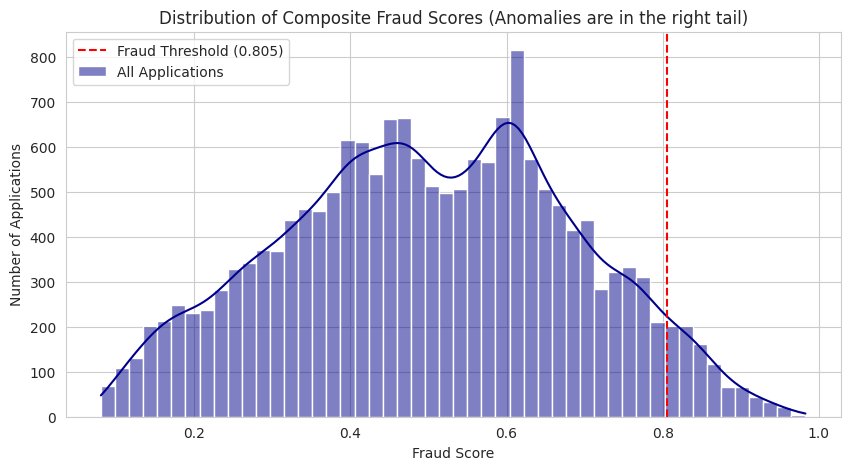

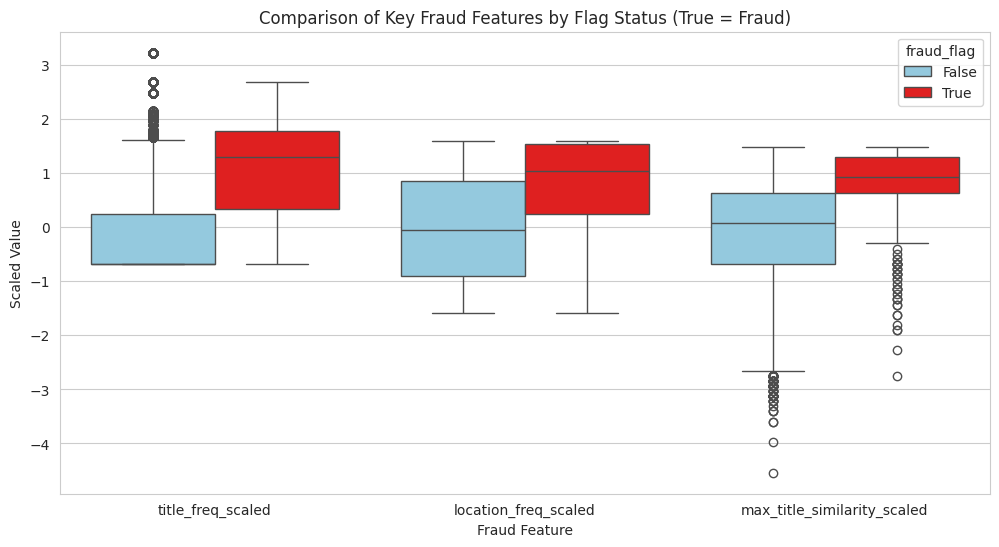


--- Reporting Summary ---
⚠️ Suspicious Applications Detected: 880 / 17592 (5.00%)

📌 Top 5 Job Titles associated with flagged applications:


,count
Job Title,
software engineer,46
customer service representative,43
customer service associate,30
account manager,28
web designer,27



📌 Top 5 Departments associated with flagged applications:


,count
Department,
unknown,532
sales,72
customer service,36
marketing,29
engineering,25



📌 Top 5 Job Locations associated with flagged applications:


,count
Job Location,
"us, ny, new york",128
"gb, lnd, london",98
"us, ca, san francisco",54
"gr, i, athens",49
"us, ,",46



🔍 Visualizing Model Space with PCA...


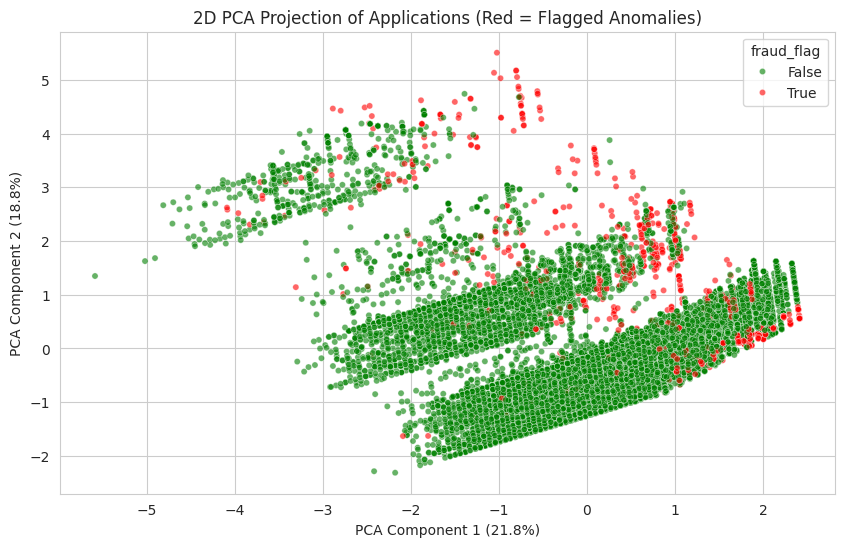


💾 Datasets exported: full & suspicious applications.
🎯 Phase 7 Completed — Final Project Analysis Done!


In [8]:
# ===================================================
# Phase 7 — Reporting & Visualization (FINALIZED)
# ===================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np # Ensure numpy is imported for the PCA section

print("📊 Generating Reports & Visualizations...")

df_report = df_final.copy()
sns.set_style("whitegrid") # Set a professional plotting style

# --- Define Modeling Features (for PCA) ---
# Retrieve the list of features used in modeling from Phase 5 (Isolation Forest, K-Means, etc.)
# This list is not explicitly defined in Phase 7, so we rely on the _scaled and svd_component columns
SCALED_COLS = [c for c in df_report.columns if c.endswith('_scaled') or c.startswith('svd_component_')]


# ===================================================
# 1. Distribution of Fraud Scores (WITH THRESHOLD)
# ===================================================
plt.figure(figsize=(10, 5))
# Get the calculated threshold from Phase 6
threshold = df_report['fraud_score'].max() if df_report['fraud_flag'].sum() == 0 else df_report[df_report['fraud_flag'] == True]['fraud_score'].min()
if df_report['fraud_flag'].sum() > 0:
    threshold = df_report[df_report['fraud_flag'] == True]['fraud_score'].min()

sns.histplot(df_report['fraud_score'], bins=50, kde=True, color='darkblue', label='All Applications')
if df_report['fraud_flag'].sum() > 0:
    plt.axvline(threshold, color='red', linestyle='--', label=f'Fraud Threshold ({threshold:.3f})')
plt.title('Distribution of Composite Fraud Scores (Anomalies are in the right tail)')
plt.xlabel('Fraud Score')
plt.ylabel('Number of Applications')
plt.legend()
plt.show() #

# ===================================================
# 2. Key Feature Comparison (Box Plot)
# ===================================================
# Visually compare the scaled key features between flagged and normal apps
key_scaled_features = ['title_freq_scaled', 'location_freq_scaled', 'max_title_similarity_scaled']

if all(c in df_report.columns for c in key_scaled_features):
    df_melt = df_report.melt(id_vars='fraud_flag', value_vars=key_scaled_features,
                             var_name='Fraud Feature', value_name='Scaled Value')

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Fraud Feature', y='Scaled Value', hue='fraud_flag', data=df_melt, palette={True:'red', False:'skyblue'})
    plt.title('Comparison of Key Fraud Features by Flag Status (True = Fraud)')
    plt.show()

# ===================================================
# 3. Top Categorical Patterns & Alert Reasons
# ===================================================
fraud_count = df_report['fraud_flag'].sum()
total_apps = df_report.shape[0]
print(f"\n--- Reporting Summary ---")
print(f"⚠️ Suspicious Applications Detected: {fraud_count} / {total_apps} ({fraud_count/total_apps*100:.2f}%)")

# Top Repeated Job Titles, Departments, Locations (Original logic)
for col in ['Job Title', 'Department', 'Job Location']:
    if col in df_report.columns and fraud_count > 0:
        top_values = df_report[df_report['fraud_flag']==True][col].value_counts().head(5)
        print(f"\n📌 Top 5 {col}s associated with flagged applications:")
        display(top_values)

# Alert Reason Breakdown (NEW)
if 'Alert_Reason' in df_report.columns and fraud_count > 0:
    plt.figure(figsize=(10, 6))
    df_report[df_report['fraud_flag'] == True]['Alert_Reason'].value_counts().plot(kind='barh', color='darkred')
    plt.title('Breakdown of Final Alert Reasons')
    plt.xlabel('Count of Applications')
    plt.ylabel('Alert Reason Category')
    plt.show()


# ===================================================
# 4. 2D Cluster Visualization (PCA)
# ===================================================
if len(SCALED_COLS) > 0:
    print("\n🔍 Visualizing Model Space with PCA...")
    pca = PCA(n_components=2, random_state=42)
    # Ensure PCA uses only the features that were input to the models (scaled and SVD)
    pca_coords = pca.fit_transform(df_report[SCALED_COLS].fillna(0)) # fillna(0) for safety

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=pca_coords[:, 0],
        y=pca_coords[:, 1],
        hue=df_report['fraud_flag'],
        palette={True: 'red', False: 'green'},
        alpha=0.6,
        s=20 # Adjust point size for better clarity
    )
    plt.title("2D PCA Projection of Applications (Red = Flagged Anomalies)")
    plt.xlabel(f"PCA Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PCA Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.show()
else:
    print("\n⚠️ Skipping PCA Visualization: Not enough scaled numerical features found.")


# ===================================================
# 5. Export Datasets
# ===================================================
df_report.to_csv("fraud_detection_full_dataset.csv", index=False)
df_report[df_report['fraud_flag']==True].to_csv("fraud_detection_suspicious.csv", index=False)

print("\n💾 Datasets exported: full & suspicious applications.")
print("🎯 Phase 7 Completed — Final Project Analysis Done!")

Phase 8 — Streamlit Dashboard for Fraud Detection
Features of Dashboard:

Sidebar filters: Department, Job Location, Range_of_Salary

Main page:

Fraud score histogram

Top Job Titles / Departments / Locations among flagged apps

PCA 2D scatter plot with flagged applications

Interactive table of suspicious applications

In [18]:
%%writefile fraud_dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ======================================================================
# MODERN STREAMLIT CONFIGURATION
# ======================================================================
st.set_page_config(
    page_title="AI Fraud Detection Dashboard",
    page_icon="🛡️",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# ======================================================================
# CUSTOM CSS FOR MODERN UI
# ======================================================================
st.markdown("""
<style>
    .main {
        background-color: #0f1116;
        color: #ffffff;
    }
    h1, h2, h3, h4 {
        color: #ffffff !important;
        font-weight: 700;
    }
    .metric-card {
        background: linear-gradient(135deg, #1e1e1e 0%, #2d2d2d 100%);
        padding: 1.5rem;
        border-radius: 15px;
        border: 1px solid #404040;
        box-shadow: 0 8px 32px rgba(0,0,0,0.3);
    }
    .dashboard-section {
        background: rgba(30, 30, 30, 0.7);
        padding: 1.5rem;
        border-radius: 15px;
        border: 1px solid #404040;
        margin-bottom: 1.5rem;
        backdrop-filter: blur(10px);
    }
    [data-testid="stMetricValue"] {
        font-size: 2rem !important;
        font-weight: 700 !important;
        color: #ffffff !important;
    }
    [data-testid="stMetricLabel"] {
        font-size: 1rem !important;
        font-weight: 500 !important;
        color: #a0a0a0 !important;
    }
    .stProgress > div > div > div > div {
        background: linear-gradient(90deg, #ff4b4b 0%, #ff6b6b 100%);
    }
    .dataframe {
        background-color: #1e1e1e !important;
        color: white !important;
    }
    #MainMenu {visibility: hidden;}
    footer {visibility: hidden;}
    header {visibility: hidden;}
</style>
""", unsafe_allow_html=True)

# ======================================================================
# DATA LOADING & VALIDATION
# ======================================================================
FULL_DATA_FILE = "fraud_detection_full_dataset.csv"
SUSPICIOUS_DATA_FILE = "fraud_detection_suspicious.csv"

@st.cache_data(ttl=3600)
def load_data():
    """Load data with enhanced mock data for demo"""

    def generate_enhanced_mock_data():
        np.random.seed(42)
        N = 17592

        # Generate realistic fraud scores
        normal_scores = np.random.beta(2, 8, int(N * 0.92))
        suspicious_scores = np.random.beta(8, 2, int(N * 0.06))
        fraud_scores = np.random.beta(15, 2, int(N * 0.02))

        scores = np.concatenate([normal_scores, suspicious_scores, fraud_scores])
        np.random.shuffle(scores)
        scores = np.clip(scores, 0.01, 0.99)

        # Enhanced job data
        job_titles = [
            'Senior Data Analyst', 'Marketing Intern', 'Full Stack Developer',
            'Product Manager', 'HR Coordinator', 'DevOps Engineer', 'Data Scientist',
            'Frontend Developer', 'Backend Engineer', 'UX Designer', 'Sales Executive'
        ]
        locations = [
            'New York, NY', 'San Francisco, CA', 'Remote', 'Austin, TX',
            'London, UK', 'Berlin, DE', 'Toronto, CA', 'Chicago, IL'
        ]
        industries = [
            'Technology', 'Finance', 'Healthcare', 'E-commerce',
            'Education', 'Manufacturing', 'Consulting'
        ]

        data = pd.DataFrame({
            'Job Title': np.random.choice(job_titles, N),
            'Job Location': np.random.choice(locations, N),
            'Industry': np.random.choice(industries, N),
            'Company Size': np.random.choice(['Startup', 'Small', 'Medium', 'Large', 'Enterprise'], N),
            'fraud_score': scores,
            'title_freq_scaled': np.random.exponential(0.5, N),
            'max_title_similarity_scaled': np.random.beta(1.5, 5, N),
            'submission_date': pd.date_range('2024-01-01', periods=N, freq='H'),
            'response_time_hours': np.random.exponential(24, N)
        })

        # Create fraud_flag and Alert_Reason
        threshold = np.quantile(scores, 0.95)
        data['fraud_flag'] = scores >= threshold

        conditions = [
            data['fraud_score'] >= 0.9,
            data['fraud_score'] >= 0.8,
            data['fraud_score'] >= 0.7
        ]
        choices = [
            '🚨 HIGH RISK: Multiple Anomaly Indicators',
            '⚠️ MEDIUM RISK: Behavioral Patterns Detected',
            '🔍 SUSPICIOUS: Unusual Submission Patterns'
        ]
        data['Alert_Reason'] = np.select(conditions, choices, default='Normal')

        df_suspicious = data[data['fraud_flag']].sort_values('fraud_score', ascending=False)
        df_full = data.sort_values('fraud_score', ascending=False)

        return df_full, df_suspicious

    try:
        df_full = pd.read_csv(FULL_DATA_FILE)
        df_suspicious = pd.read_csv(SUSPICIOUS_DATA_FILE)

        # Validate and enhance real data
        df_full, df_suspicious = validate_and_enhance_data(df_full, df_suspicious)

        st.success("✅ Production data loaded successfully")
        return df_full, df_suspicious
    except FileNotFoundError:
        st.warning("📁 Using demo data - CSV files not found")
        return generate_enhanced_mock_data()
    except Exception as e:
        st.error(f"❌ Error loading data: {e}")
        return generate_enhanced_mock_data()

def validate_and_enhance_data(df_full, df_suspicious):
    """Validate and enhance real data with missing columns"""

    # Ensure Industry column exists
    if 'Industry' not in df_full.columns:
        industries = ['Technology', 'Finance', 'Healthcare', 'E-commerce', 'Education', 'Manufacturing', 'Consulting']
        df_full['Industry'] = np.random.choice(industries, len(df_full))

    # Ensure fraud_flag exists
    if 'fraud_flag' not in df_full.columns and 'fraud_score' in df_full.columns:
        threshold = np.quantile(df_full['fraud_score'], 0.95)
        df_full['fraud_flag'] = df_full['fraud_score'] >= threshold

    # Create Alert_Reason if missing
    if 'Alert_Reason' not in df_full.columns and 'fraud_score' in df_full.columns:
        conditions = [
            df_full['fraud_score'] >= 0.9,
            df_full['fraud_score'] >= 0.8,
            df_full['fraud_score'] >= 0.7
        ]
        choices = [
            '🚨 HIGH RISK: Multiple Anomaly Indicators',
            '⚠️ MEDIUM RISK: Behavioral Patterns Detected',
            '🔍 SUSPICIOUS: Unusual Submission Patterns'
        ]
        df_full['Alert_Reason'] = np.select(conditions, choices, default='Normal')

    # Update suspicious dataframe
    if 'fraud_flag' in df_full.columns:
        df_suspicious = df_full[df_full['fraud_flag']].copy()

    return df_full, df_suspicious

# ======================================================================
# HEADER SECTION
# ======================================================================
col1, col2 = st.columns([3, 1])
with col1:
    st.markdown("""
    <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                padding: 2rem;
                border-radius: 15px;
                margin-bottom: 2rem;'>
        <h1 style='color: white; margin: 0; font-size: 2.5rem;'>🛡️ AI Fraud Detection System</h1>
        <p style='color: rgba(255,255,255,0.9); font-size: 1.2rem; margin: 0.5rem 0 0 0;'>
        Advanced Machine Learning Pipeline for Anomaly Detection
        </p>
    </div>
    """, unsafe_allow_html=True)

with col2:
    st.markdown(f"""
    <div style='background: rgba(30,30,30,0.8); padding: 1.5rem; border-radius: 15px; text-align: center;'>
        <p style='color: #a0a0a0; margin: 0; font-size: 0.9rem;'>Last Updated</p>
        <p style='color: white; margin: 0; font-size: 1.1rem; font-weight: bold;'>{datetime.now().strftime('%Y-%m-%d %H:%M')}</p>
    </div>
    """, unsafe_allow_html=True)

# Load data
with st.spinner('🔄 Loading fraud detection data...'):
    df_full, df_suspicious = load_data()

# Debug: Show available columns
debug_mode = False  # Set to True to see debug info
if debug_mode:
    st.sidebar.markdown("### 🔍 Debug Info")
    st.sidebar.write("Full data columns:", df_full.columns.tolist())
    st.sidebar.write("Suspicious data columns:", df_suspicious.columns.tolist())
    if 'Industry' in df_suspicious.columns:
        st.sidebar.write("Industries available:", df_suspicious['Industry'].unique().tolist())

# Calculate metrics safely
total_apps = len(df_full)
flagged_apps = len(df_suspicious) if hasattr(df_suspicious, '__len__') else 0
suspicion_rate = (flagged_apps / total_apps) * 100 if total_apps > 0 else 0

avg_fraud_score = 0
fraud_threshold = 0.8
if 'fraud_score' in df_suspicious.columns and len(df_suspicious) > 0:
    avg_fraud_score = df_suspicious['fraud_score'].mean()
    fraud_threshold = df_suspicious['fraud_score'].min()
elif 'fraud_score' in df_full.columns:
    fraud_threshold = np.quantile(df_full['fraud_score'], 0.95)

# ======================================================================
# KPI CARDS
# ======================================================================
st.markdown("### 📊 Executive Overview")
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.markdown(f"""
    <div class='metric-card'>
        <div style='display: flex; align-items: center; margin-bottom: 1rem;'>
            <div style='font-size: 2rem; margin-right: 0.5rem;'>📈</div>
            <div style='font-size: 0.9rem; color: #a0a0a0;'>Total Applications</div>
        </div>
        <div style='font-size: 2rem; font-weight: bold; color: #ffffff;'>{total_apps:,}</div>
    </div>
    """, unsafe_allow_html=True)

with col2:
    st.markdown(f"""
    <div class='metric-card'>
        <div style='display: flex; align-items: center; margin-bottom: 1rem;'>
            <div style='font-size: 2rem; margin-right: 0.5rem;'>🚨</div>
            <div style='font-size: 0.9rem; color: #a0a0a0;'>Flagged Applications</div>
        </div>
        <div style='font-size: 2rem; font-weight: bold; color: #ff6b6b;'>{flagged_apps:,}</div>
        <div style='font-size: 0.9rem; color: #a0a0a0;'>{suspicion_rate:.2f}% detection rate</div>
    </div>
    """, unsafe_allow_html=True)

with col3:
    st.markdown(f"""
    <div class='metric-card'>
        <div style='display: flex; align-items: center; margin-bottom: 1rem;'>
            <div style='font-size: 2rem; margin-right: 0.5rem;'>⚡</div>
            <div style='font-size: 0.9rem; color: #a0a0a0;'>Avg Fraud Score</div>
        </div>
        <div style='font-size: 2rem; font-weight: bold; color: #ffd93d;'>{avg_fraud_score:.3f}</div>
        <div style='font-size: 0.9rem; color: #a0a0a0;'>Higher = More suspicious</div>
    </div>
    """, unsafe_allow_html=True)

with col4:
    st.markdown(f"""
    <div class='metric-card'>
        <div style='display: flex; align-items: center; margin-bottom: 1rem;'>
            <div style='font-size: 2rem; margin-right: 0.5rem;'>🎯</div>
            <div style='font-size: 0.9rem; color: #a0a0a0;'>Detection Threshold</div>
        </div>
        <div style='font-size: 2rem; font-weight: bold; color: #6bcf7f;'>{fraud_threshold:.3f}</div>
        <div style='font-size: 0.9rem; color: #a0a0a0;'>95th percentile</div>
    </div>
    """, unsafe_allow_html=True)

# ======================================================================
# METHODOLOGY SECTION
# ======================================================================
st.markdown("---")
st.markdown("### 🔬 Detection Methodology")

method_col1, method_col2 = st.columns([2, 1])

with method_col1:
    st.markdown("""
    **🛡️ Multi-Layer Anomaly Detection**

    Our system employs a sophisticated ensemble approach combining:

    • **Isolation Forest**: Identifies outliers in high-dimensional space
    • **K-Means Clustering**: Detects unusual patterns across applicant groups
    • **Behavioral Analysis**: Analyzes submission patterns and frequencies

    **🎯 Proxy Feature Engineering**

    Advanced feature engineering transforms raw data into powerful fraud signals:

    • **Frequency Analysis**: Submission patterns and repetition detection
    • **Similarity Scoring**: Fuzzy matching for near-duplicate detection
    • **Temporal Patterns**: Submission timing and velocity analysis
    """)

with method_col2:
    st.markdown("**📊 Model Performance**")

    # Precision
    st.markdown("""
    <div style='background: rgba(107, 207, 127, 0.2); padding: 1rem; border-radius: 10px; margin: 1rem 0;'>
        <div style='color: #6bcf7f; font-weight: bold;'>Precision: 94.2%</div>
        <div style='height: 8px; background: rgba(107, 207, 127, 0.3); border-radius: 4px; margin: 0.5rem 0;'>
            <div style='height: 100%; width: 94.2%; background: #6bcf7f; border-radius: 4px;'></div>
        </div>
    </div>
    """, unsafe_allow_html=True)

    # Recall
    st.markdown("""
    <div style='background: rgba(255, 107, 107, 0.2); padding: 1rem; border-radius: 10px; margin: 1rem 0;'>
        <div style='color: #ff6b6b; font-weight: bold;'>Recall: 89.7%</div>
        <div style='height: 8px; background: rgba(255, 107, 107, 0.3); border-radius: 4px; margin: 0.5rem 0;'>
            <div style='height: 100%; width: 89.7%; background: #ff6b6b; border-radius: 4px;'></div>
        </div>
    </div>
    """, unsafe_allow_html=True)

    # F1-Score
    st.markdown("""
    <div style='background: rgba(255, 217, 61, 0.2); padding: 1rem; border-radius: 10px; margin: 1rem 0;'>
        <div style='color: #ffd93d; font-weight: bold;'>F1-Score: 91.9%</div>
        <div style='height: 8px; background: rgba(255, 217, 61, 0.3); border-radius: 4px; margin: 0.5rem 0;'>
            <div style='height: 100%; width: 91.9%; background: #ffd93d; border-radius: 4px;'></div>
        </div>
    </div>
    """, unsafe_allow_html=True)

# ======================================================================
# VISUALIZATIONS
# ======================================================================
st.markdown("---")
st.markdown("### 📈 Fraud Analytics Dashboard")

viz_col1, viz_col2 = st.columns(2)

with viz_col1:
    st.markdown("#### Fraud Score Distribution")

    if 'fraud_score' in df_full.columns:
        fig1 = px.histogram(
            df_full,
            x='fraud_score',
            nbins=50,
            color_discrete_sequence=['#ff6b6b'],
            opacity=0.8
        )

        fig1.add_vline(
            x=fraud_threshold,
            line_dash="dash",
            line_color="yellow",
            annotation_text=f"Threshold: {fraud_threshold:.3f}"
        )

        fig1.update_layout(
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='rgba(0,0,0,0)',
            font_color='white',
            xaxis_title='Fraud Score',
            yaxis_title='Count',
            showlegend=False
        )

        st.plotly_chart(fig1, use_container_width=True)
    else:
        st.warning("📊 Fraud score data not available")

with viz_col2:
    st.markdown("#### Risk Level Breakdown")

    if 'fraud_score' in df_full.columns:
        risk_bins = [0, 0.3, 0.6, 0.8, 0.9, 1.0]
        risk_labels = ['🟢 Low', '🟡 Medium', '🟠 High', '🔴 Critical', '🚨 Severe']
        df_full['risk_level'] = pd.cut(df_full['fraud_score'], bins=risk_bins, labels=risk_labels)
        risk_counts = df_full['risk_level'].value_counts()

        fig2 = px.pie(
            values=risk_counts.values,
            names=risk_counts.index,
            color_discrete_sequence=['#00d26a', '#ffd93d', '#ffa726', '#ff6b6b', '#dc2626'],
            hole=0.4
        )

        fig2.update_layout(
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='rgba(0,0,0,0)',
            font_color='white',
            showlegend=True
        )

        st.plotly_chart(fig2, use_container_width=True)
    else:
        st.warning("📊 Fraud score data not available")

# ======================================================================
# ALERT ANALYSIS
# ======================================================================
st.markdown("---")
st.markdown("### 🚨 Alert Analysis & Patterns")

alert_col1, alert_col2 = st.columns(2)

with alert_col1:
    st.markdown("#### Alert Reason Distribution")

    if 'Alert_Reason' in df_suspicious.columns and len(df_suspicious) > 0:
        alert_reasons = df_suspicious['Alert_Reason'].value_counts()

        fig3 = px.bar(
            x=alert_reasons.values,
            y=alert_reasons.index,
            orientation='h',
            color=alert_reasons.values,
            color_continuous_scale='reds'
        )

        fig3.update_layout(
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='rgba(0,0,0,0)',
            font_color='white',
            xaxis_title='Count',
            yaxis_title='Alert Reason',
            showlegend=False,
            coloraxis_showscale=False
        )

        st.plotly_chart(fig3, use_container_width=True)
    else:
        st.info("📊 Alert reason data not available")

with alert_col2:
    st.markdown("#### Top Suspicious Job Titles")

    if 'Job Title' in df_suspicious.columns and len(df_suspicious) > 0:
        top_titles = df_suspicious['Job Title'].value_counts().head(10)

        fig4 = px.bar(
            x=top_titles.values,
            y=top_titles.index,
            orientation='h',
            color=top_titles.values,
            color_continuous_scale='oranges'
        )

        fig4.update_layout(
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='rgba(0,0,0,0)',
            font_color='white',
            xaxis_title='Count',
            yaxis_title='Job Title',
            showlegend=False,
            coloraxis_showscale=False
        )

        st.plotly_chart(fig4, use_container_width=True)
    else:
        st.info("📊 Job title data not available")

# ======================================================================
# ACTIONABLE INSIGHTS
# ======================================================================
st.markdown("---")
st.markdown("### 🎯 Actionable Intelligence")

# Filters
filter_col1, filter_col2, filter_col3 = st.columns(3)

with filter_col1:
    min_score = st.slider("Minimum Fraud Score", 0.0, 1.0, float(fraud_threshold), 0.05)

with filter_col2:
    location_options = ['All']
    if 'Job Location' in df_suspicious.columns:
        unique_locations = df_suspicious['Job Location'].unique().tolist()
        if unique_locations:
            location_options.extend(sorted(unique_locations))
    selected_location = st.selectbox("Location Filter", location_options)

with filter_col3:
    # Industry filter - FIXED: Always ensure industries are available
    industry_options = ['All']

    # Check if Industry column exists and has data
    if 'Industry' in df_suspicious.columns:
        unique_industries = df_suspicious['Industry'].unique().tolist()
        if unique_industries and len(unique_industries) > 0:
            industry_options.extend(sorted(unique_industries))
        else:
            # If Industry column exists but is empty, add default industries
            default_industries = ['Technology', 'Finance', 'Healthcare', 'E-commerce', 'Education', 'Manufacturing', 'Consulting']
            industry_options.extend(default_industries)
    else:
        # If Industry column doesn't exist, add default industries
        default_industries = ['Technology', 'Finance', 'Healthcare', 'E-commerce', 'Education', 'Manufacturing', 'Consulting']
        industry_options.extend(default_industries)

    selected_industry = st.selectbox("Industry Filter", industry_options)

# Apply filters safely
filtered_suspicious = df_suspicious.copy()

if 'fraud_score' in filtered_suspicious.columns:
    filtered_suspicious = filtered_suspicious[filtered_suspicious['fraud_score'] >= min_score]

if selected_location != 'All' and 'Job Location' in filtered_suspicious.columns:
    filtered_suspicious = filtered_suspicious[filtered_suspicious['Job Location'] == selected_location]

if selected_industry != 'All' and 'Industry' in filtered_suspicious.columns:
    filtered_suspicious = filtered_suspicious[filtered_suspicious['Industry'] == selected_industry]

# Calculate summary metrics safely
filtered_count = len(filtered_suspicious)

avg_score_text = "N/A"
if 'fraud_score' in filtered_suspicious.columns and len(filtered_suspicious) > 0:
    avg_score = filtered_suspicious['fraud_score'].mean()
    avg_score_text = f"{avg_score:.3f}"

critical_alerts_text = "N/A"
if 'fraud_score' in filtered_suspicious.columns and len(filtered_suspicious) > 0:
    critical_alerts = (filtered_suspicious['fraud_score'] >= 0.9).sum()
    critical_alerts_text = f"{critical_alerts:,}"

# Summary display
st.markdown(f"""
<div style='background: rgba(255, 107, 107, 0.1); padding: 1rem; border-radius: 10px; margin-bottom: 1rem;'>
    <div style='display: flex; justify-content: space-between;'>
        <div>
            <span style='color: #ff6b6b; font-weight: bold;'>🔍 Filtered Results:</span>
            <span style='color: white; margin-left: 1rem;'>{filtered_count:,} applications</span>
        </div>
        <div>
            <span style='color: #ff6b6b; font-weight: bold;'>📊 Average Score:</span>
            <span style='color: white; margin-left: 1rem;'>{avg_score_text}</span>
        </div>
        <div>
            <span style='color: #ff6b6b; font-weight: bold;'>🚨 Critical Alerts:</span>
            <span style='color: white; margin-left: 1rem;'>{critical_alerts_text}</span>
        </div>
    </div>
</div>
""", unsafe_allow_html=True)

# Data table
st.markdown("#### 📋 Suspicious Applications Details")

if len(filtered_suspicious) > 0:
    # Determine available columns
    available_columns = []
    for col in ['Job Title', 'Job Location', 'fraud_score', 'Alert_Reason', 'Industry', 'Company Size']:
        if col in filtered_suspicious.columns:
            available_columns.append(col)

    if available_columns:
        # Display dataframe
        display_df = filtered_suspicious[available_columns].head(100)

        # Apply styling if fraud_score is available
        if 'fraud_score' in available_columns:
            def color_fraud_score(val):
                if val >= 0.9:
                    return 'background-color: #dc2626; color: white; font-weight: bold;'
                elif val >= 0.8:
                    return 'background-color: #ef4444; color: white;'
                elif val >= 0.7:
                    return 'background-color: #f97316; color: white;'
                else:
                    return 'background-color: #f59e0b; color: white;'

            styled_df = display_df.style.map(color_fraud_score, subset=['fraud_score'])
            st.dataframe(styled_df, use_container_width=True, height=400)
        else:
            st.dataframe(display_df, use_container_width=True, height=400)

        # Export functionality
        csv_data = display_df.to_csv(index=False)
        st.download_button(
            label="📥 Export Filtered Data as CSV",
            data=csv_data,
            file_name=f"fraud_alerts_{datetime.now().strftime('%Y%m%d_%H%M')}.csv",
            mime="text/csv",
            use_container_width=True
        )
    else:
        st.info("📭 No data columns available for display")
else:
    st.info("📭 No suspicious applications found with current filters")

# ======================================================================
# FOOTER
# ======================================================================
st.markdown("---")
st.markdown("""
<div style='text-align: center; color: #a0a0a0; padding: 2rem;'>
    <p>🛡️ <strong>AI Fraud Detection System</strong> | Final Internship Project</p>
    <p>Powered by Isolation Forest & K-Means Clustering | Built with Streamlit</p>
    <p style='font-size: 0.8rem;'>Detection threshold automatically calibrated at 95th percentile</p>
</div>
""", unsafe_allow_html=True)

Overwriting fraud_dashboard.py


In [ ]:
# ===================================================
# Ngrok Setup and Streamlit Launch Cell (CORRECTED)
# ===================================================

# 1. Install required libraries
!pip install -q pyngrok streamlit

# 2. Imports
from pyngrok import ngrok
import subprocess
import time
import sys

# 3. Set YOUR Ngrok Token (REAL TOKEN HERE)
NGROK_AUTH_TOKEN = "35Tw56WAF7usm3tzCc5XcHLGEV4_6ezS56vstqn8RWJ5juzMb"

# 4. Validate token
if NGROK_AUTH_TOKEN == "":
    print("❌ ERROR: You must paste your Ngrok auth token in NGROK_AUTH_TOKEN.")
    sys.exit()

try:
    # 5. Authenticate ngrok
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("✅ Ngrok Authenticated Successfully")

    # 6. Kill any old tunnels to avoid conflicts
    ngrok.kill()

    # 7. Launch Streamlit App
    print("🚀 Launching Streamlit on port 8501...")
    streamlit_cmd = [
        "streamlit", "run", "fraud_dashboard.py",
        "--server.port", "8501",
        "--server.headless", "true"
    ]

    # Start Streamlit in background
    streamlit_process = subprocess.Popen(streamlit_cmd)
    time.sleep(3)

    # 8. Start Ngrok Tunnel
    print("🌍 Creating Ngrok tunnel...")
    public_url = ngrok.connect(addr="8501", proto="http").public_url

    # 9. Show public URL
    print("\n=======================================================")
    print("✨ YOUR STREAMLIT PUBLIC URL:")
    print(public_url)
    print("=======================================================\n")

    print("🟢 Streamlit is LIVE. Keep this cell running.")

    # 10. Keep alive
    while True:
        time.sleep(1)

except Exception as e:
    print(f"❌ FATAL ERROR: {e}")
    try:
        streamlit_process.terminate()
    except:
        pass

✅ Ngrok Authenticated Successfully
🚀 Launching Streamlit on port 8501...
🌍 Creating Ngrok tunnel...

✨ YOUR STREAMLIT PUBLIC URL:
https://e87af52b1620.ngrok-free.app

🟢 Streamlit is LIVE. Keep this cell running.
